Random Forest Classification Report:
              precision    recall  f1-score   support

           0      0.550     0.445     0.492       236
           1      0.721     0.797     0.757       424

    accuracy                          0.671       660
   macro avg      0.635     0.621     0.624       660
weighted avg      0.660     0.671     0.662       660

Random Forest ROC AUC: 0.703


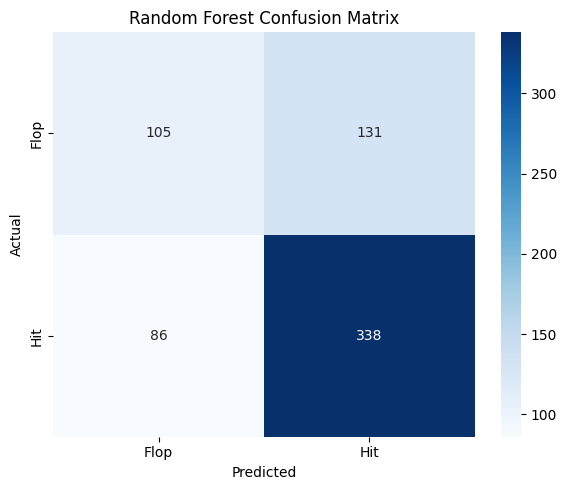

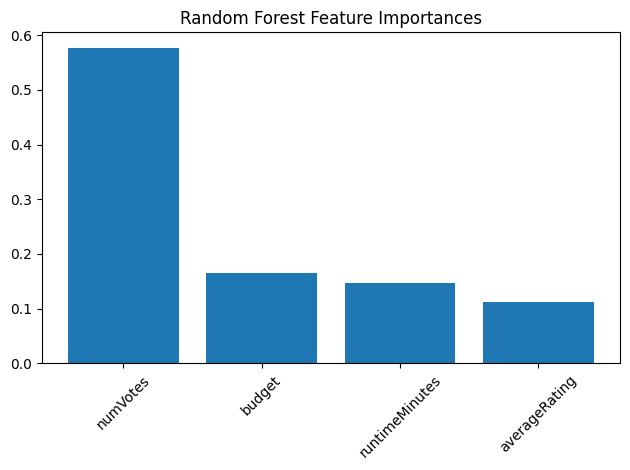


Logistic Regression Results:
Accuracy: 0.6409
F1 Score: 0.7481


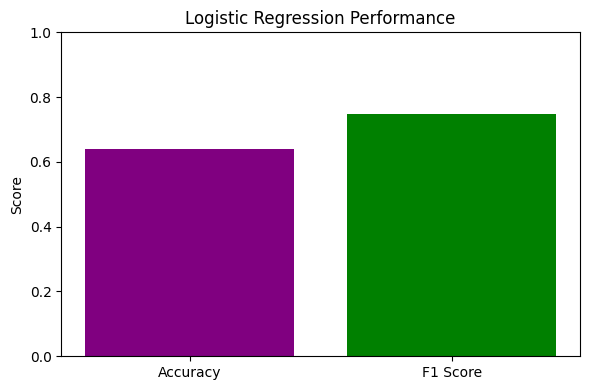


XGBoost Classification Report:
              precision    recall  f1-score   support

           0      0.498     0.496     0.497       236
           1      0.720     0.722     0.721       424

    accuracy                          0.641       660
   macro avg      0.609     0.609     0.609       660
weighted avg      0.641     0.641     0.641       660

XGBoost ROC AUC: 0.686


/home/ubuntu/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:29:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


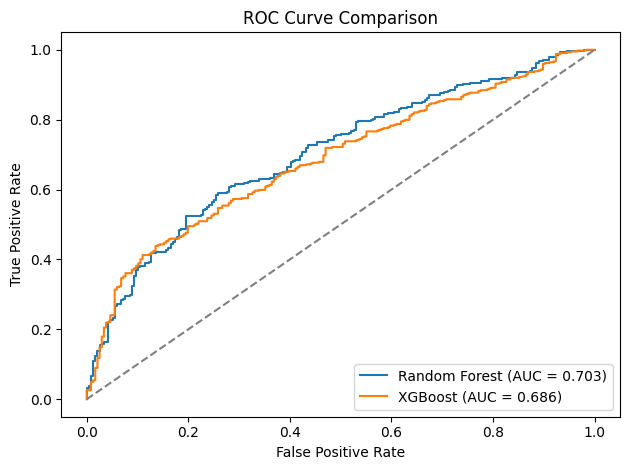

/home/ubuntu/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:29:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ubuntu/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:29:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ubuntu/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:29:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ubuntu/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:29:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Random Forest Cross-Validated F1 Score: 0.7841 ± 0.0271
XGBoost Cross-Validated F1 Score: 0.7573 ± 0.0328


/home/ubuntu/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:29:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


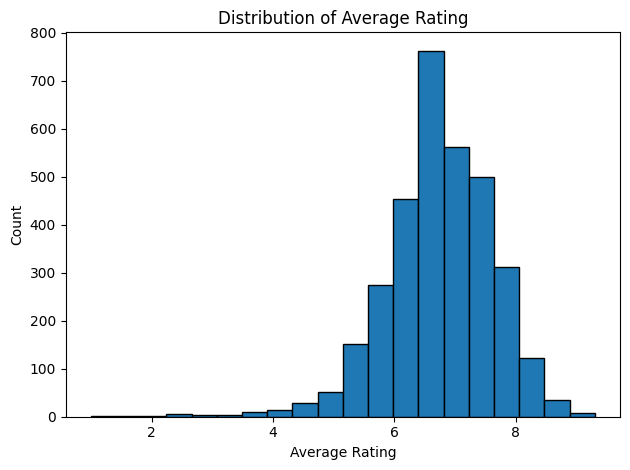

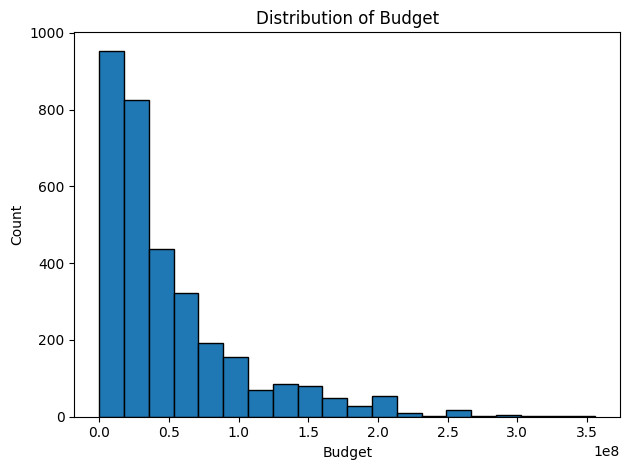

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    roc_auc_score,
)

from xgboost import XGBClassifier

# Load and preprocess data
df = pd.read_csv("Filtered IMDb Movies TV Shows.csv")  # Modify path if needed

# Convert budget and gross to numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

# Define hit/flop: Hit = gross >= 2 * budget
df['HitFlop'] = np.where(df['gross'] >= 2 * df['budget'], 1, 0)

# Drop rows with missing values in key columns
df.dropna(subset=['budget', 'gross', 'runtimeMinutes', 'averageRating', 'numVotes'], inplace=True)

# Features and labels
features = ['budget', 'runtimeMinutes', 'averageRating', 'numVotes']
X = df[features]
y = df['HitFlop']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
cm_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = auc(*roc_curve(y_test, y_prob_rf)[:2])

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=3))
print(f"Random Forest ROC AUC: {roc_auc_rf:.3f}")

# Confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Flop', 'Hit'], yticklabels=['Flop', 'Hit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

# Feature Importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# Logistic Regression Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

plt.figure(figsize=(6, 4))
plt.bar(['Accuracy', 'F1 Score'], [accuracy_lr, f1_lr], color=['purple', 'green'])
plt.ylim(0, 1)
plt.title('Logistic Regression Performance')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# XGBoost Model Comparison
xgb = XGBClassifier(n_estimators=100, max_depth=5, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, digits=3))
print(f"XGBoost ROC AUC: {roc_auc_xgb:.3f}")

# ROC Curve comparison
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Cross-Validation Scores
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
xgb_cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='f1')

print(f"\nRandom Forest Cross-Validated F1 Score: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")
print(f"XGBoost Cross-Validated F1 Score: {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")

# Extra Distributions
plt.figure()
plt.hist(df['averageRating'], bins=20, edgecolor='black')
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.title("Distribution of Average Rating")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(df['budget'], bins=20, edgecolor='black')
plt.xlabel("Budget")
plt.ylabel("Count")
plt.title("Distribution of Budget")
plt.tight_layout()
plt.show()
